# More tests

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utilities import between, plot, plot_one_graph, read_csv, get_fit_factor_between_two_events, get_fit_factors, read_2_sensors

In [2]:
dfs = read_2_sensors(template='../milestone_eoy_2023_{}.csv')

In [3]:
dfs

{'breathing_area_df':                            pm1   pm4  pm25  pm10  n05    n1   n25    n4   n10  \
 timestamp                                                                       
 2023-12-15 19:45:40+00:00  0.8   8.4   5.0  10.1  0.0   1.0   5.3   6.2   6.4   
 2023-12-15 19:45:41+00:00  0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0   
 2023-12-15 19:45:42+00:00  0.4   4.2   2.5   5.0  0.0   0.5   2.6   3.1   3.2   
 2023-12-15 19:45:43+00:00  0.4   4.1   2.5   5.0  0.0   0.5   2.6   3.1   3.2   
 2023-12-15 19:45:45+00:00  0.4   4.1   2.4   4.9  0.0   0.5   2.6   3.0   3.1   
 ...                        ...   ...   ...   ...  ...   ...   ...   ...   ...   
 2023-12-16 03:24:54+00:00  2.6   9.9   6.7  11.5  6.7  16.1  20.1  21.0  21.2   
 2023-12-16 03:24:55+00:00  2.6   9.9   6.7  11.5  6.7  16.0  20.1  20.9  21.1   
 2023-12-16 03:24:56+00:00  2.6   9.9   6.7  11.5  6.8  16.1  20.1  21.0  21.2   
 2023-12-16 03:24:57+00:00  2.7  10.0   6.8  11.6  6.8  16.2  20.3  21.2  21.

In [51]:
dfs_2 = read_2_sensors(template='../milestone_eoy_2023_part_2_{}.csv')

In [52]:
dfs_2

{'breathing_area_df':                            pm1   pm4  pm25  pm10  n05    n1   n25    n4   n10  \
 timestamp                                                                       
 2023-12-16 03:25:00+00:00  2.7  10.3   6.9  11.9  7.1  16.7  20.9  21.8  22.0   
 2023-12-16 03:25:01+00:00  2.7  10.3   7.0  11.9  7.1  16.8  21.0  21.9  22.1   
 2023-12-16 03:25:02+00:00  2.7  10.3   7.0  12.0  7.1  16.8  21.0  21.9  22.1   
 2023-12-16 03:25:03+00:00  2.7  10.3   7.0  12.0  7.1  16.8  21.0  21.9  22.1   
 2023-12-16 03:25:04+00:00  2.7  10.2   6.9  11.9  7.0  16.6  20.8  21.7  21.9   
 ...                        ...   ...   ...   ...  ...   ...   ...   ...   ...   
 2023-12-16 20:17:45+00:00  1.1   3.7   2.6   4.2  4.0   7.5   8.9   9.2   9.2   
 2023-12-16 20:17:47+00:00  1.2   3.8   2.7   4.4  4.3   7.8   9.3   9.6   9.7   
 2023-12-16 20:17:48+00:00  1.2   3.9   2.7   4.4  4.3   7.9   9.4   9.7   9.8   
 2023-12-16 20:17:49+00:00  1.2   3.9   2.7   4.5  4.4   8.0   9.5   9.8   9.

In [53]:
combined = {
    'breathing_area_df': pd.concat([dfs['breathing_area_df'], dfs_2['breathing_area_df']]),
    'ambient_area_df': pd.concat([dfs['ambient_area_df'], dfs_2['ambient_area_df']]),
}

In [141]:
normal_breathing_start_offset = pd.to_timedelta('15 seconds')
start_datetime = pd.to_datetime('2023-12-15 21:41:12 -05:00')
start_datetime_2 = pd.to_datetime('2023-12-15 22:11:30 -05:00')
start_datetime_3 = pd.to_datetime('2023-12-16 14:56:23 -05:00')


metadata = [
    {
        'title': 'Part I',
        'window': {
            'start': start_datetime, 
            'end': start_datetime + pd.to_timedelta('30 minutes 5 seconds')
        },
        'events': [
            {
                'event': 'start fan & humidifier',
                'timedelta': pd.to_timedelta('0 minutes 12 seconds')
            },
            {
                'event': 'turn off humidifier',
                'timedelta': pd.to_timedelta('2 minutes 0 seconds')
            },
            {
                'event': 'turn off fan',
                'timedelta': pd.to_timedelta('2 minutes 20 seconds')
            },
            {
                'event': 'turn on AirGo',
                'timedelta': pd.to_timedelta('2 minutes 34 seconds')
            },
            {
                'event': 'AirGo - with visor - normal breathing',
                'timedelta': pd.to_timedelta('2 minutes 45 seconds')
            },
            {
                'event': 'turn on fan and humidifier',
                'timedelta': pd.to_timedelta('3 minutes 46 seconds')
            },
            {
                'event': 'turn off humidifier',
                'timedelta': pd.to_timedelta('4 minutes 28 seconds')
            },
            {
                'event': 'turn off fan, turn on AirGo',
                'timedelta': pd.to_timedelta('4 minutes 51 seconds')
            },
            
            
        ]
    },
     {
        'title': 'Part II',
        'window': {
            'start': start_datetime, 
            'end': start_datetime + pd.to_timedelta('30 minutes 5 seconds')
        },
        'events': [
            {
                'event': 'AirGo - with visor - deep breathing',
                'timedelta': pd.to_timedelta('5 minutes 14 seconds')
            },
            {
                'event': 'turn on fan and humidifier',
                'timedelta': pd.to_timedelta('6 minutes 3 seconds')
            },
            {
                'event': 'turn off humidifier',
                'timedelta': pd.to_timedelta('6 minutes 23 seconds')
            },
            {
                'event': 'turn off fan',
                'timedelta': pd.to_timedelta('6 minutes 36 seconds')
            },
            {
                'event': 'turn on AirGo',
                'timedelta': pd.to_timedelta('6 minutes 36 seconds')
            },
            {
                'event': 'AirGo - with visor - grimace',
                'timedelta': pd.to_timedelta('7 minutes 3 seconds')
            },
            {
                'event': 'turn on fan and humidifier',
                'timedelta': pd.to_timedelta('8 minutes 6 seconds')
            },
            {
                'event': 'turn off humidifier',
                'timedelta': pd.to_timedelta('8 minutes 25 seconds')
            },
            {
                'event': 'turn on AirGo',
                'timedelta': pd.to_timedelta('8 minutes 52 seconds')
            },
        ]
    },
    {
        'title': 'Part III',
        'window': {
            'start': start_datetime, 
            'end': start_datetime + pd.to_timedelta('30 minutes 5 seconds')
        },
        'events': [
            {
                'event': 'AirGo - with visor - talking',
                'timedelta': pd.to_timedelta('9 minutes 0 seconds')
            },
            {
                'event': 'turn on fan and humidifier',
                'timedelta': pd.to_timedelta('9 minutes 56 seconds')
            },
            {
                'event': 'turn off humidifier',
                'timedelta': pd.to_timedelta('10 minutes 15 seconds')
            },
            {
                'event': 'turn off fan, turn on AirGo',
                'timedelta': pd.to_timedelta('10 minutes 46 seconds')
            }, 
            {
                'event': 'AirGo - with visor - bend-over',
                'timedelta': pd.to_timedelta('11 minutes 8 seconds')
            },
            {
                'event': 'turn on fan and humidifier',
                'timedelta': pd.to_timedelta('12 minutes 3 seconds')
            },
            {
                'event': 'turn off humidifier',
                'timedelta': pd.to_timedelta('12 minutes 27 seconds')
            },
            {
                'event': 'turn on AirGo',
                'timedelta': pd.to_timedelta('12 minutes 55 seconds')
            },
            {
                'event': 'turn on AirGo',
                'timedelta': pd.to_timedelta('12 minutes 55 seconds')
            },
        ]
    },
    {
        'title': 'Part IV',
        'window': {
            'start': start_datetime, 
            'end': start_datetime + pd.to_timedelta('30 minutes 5 seconds')
        },
        'events': [
            {
                'event': 'AirGo - with visor - side-to-side',
                'timedelta': pd.to_timedelta('13 minutes 3 seconds')
            },
            {
                'event': 'turn on fan and humidifier',
                'timedelta': pd.to_timedelta('14 minutes 14 seconds')
            },
            {
                'event': 'turn off humidifier',
                'timedelta': pd.to_timedelta('14 minutes 30 seconds')
            },
            {
                'event': 'turn off fan, turn on AirGo',
                'timedelta': pd.to_timedelta('14 minutes 48 seconds')
            }, 
            {
                'event': 'AirGo - with visor - up-and-down',
                'timedelta': pd.to_timedelta('15 minutes 0 seconds')
            },
            {
                'event': 'turn on fan and humidifier',
                'timedelta': pd.to_timedelta('16 minutes 5 seconds')
            },
            {
                'event': 'turn off humidifier',
                'timedelta': pd.to_timedelta('16 minutes 30 seconds')
            },
            {
                'event': 'turn on AirGo',
                'timedelta': pd.to_timedelta('16 minutes 40 seconds')
            },
        ]
    },
    {
        'title': 'Part V',
        'window': {
            'start': start_datetime, 
            'end': start_datetime + pd.to_timedelta('30 minutes 5 seconds')
        },
        'events': [
            {
                'event': 'AirGo - with visor - walking',
                'timedelta': pd.to_timedelta('16 minutes 53 seconds')
            },
            {
                'event': 'turn on fan and humidifier',
                'timedelta': pd.to_timedelta('17 minutes 59 seconds')
            },
            {
                'event': 'turn off humidifier',
                'timedelta': pd.to_timedelta('18 minutes 7 seconds')
            },
            {
                'event': 'turn on Laminair',
                'timedelta': pd.to_timedelta('19 minutes 50 seconds')
            }, 
            {
                'event': 'LaminAir - normal breathing',
                'timedelta': pd.to_timedelta('20 minutes 5 seconds')
            },
            {
                'event': 'turn on fan and humidifier',
                'timedelta': pd.to_timedelta('21 minutes 5 seconds')
            },
            {
                'event': 'turn off humidifier',
                'timedelta': pd.to_timedelta('21 minutes 15 seconds')
            },
            {
                'event': 'turn off fan',
                'timedelta': pd.to_timedelta('21 minutes 50 seconds')
            },
            {
                'event': 'turn on Laminair',
                'timedelta': pd.to_timedelta('22 minutes 8 seconds')
            },
        ]
    },
    {
        'title': 'Part VI',
        'window': {
            'start': start_datetime, 
            'end': start_datetime + pd.to_timedelta('30 minutes 5 seconds')
        },
        'events': [
            {
                'event': 'LaminAir - talking',
                'timedelta': pd.to_timedelta('22 minutes 15 seconds')
            },
            {
                'event': 'turn on fan and humidifier',
                'timedelta': pd.to_timedelta('23 minutes 13 seconds')
            },
            {
                'event': 'turn off humidifier',
                'timedelta': pd.to_timedelta('23 minutes 38 seconds')
            },
            {
                'event': 'turn on Laminair',
                'timedelta': pd.to_timedelta('24 minutes 7 seconds')
            }, 
            {
                'event': 'LaminAir - side-to-side',
                'timedelta': pd.to_timedelta('24 minutes 33 seconds')
            },
            {
                'event': 'turn on fan and humidifier',
                'timedelta': pd.to_timedelta('25 minutes 34 seconds')
            },
            {
                'event': 'turn off humidifier',
                'timedelta': pd.to_timedelta('26 minutes 3 seconds')
            },
            {
                'event': 'AirGo & LaminAir - turn on',
                'timedelta': pd.to_timedelta('26 minutes 25 seconds')
            },
            {
                'event': 'AirGo & LaminAir - normal breathing',
                'timedelta': pd.to_timedelta('26 minutes 57 seconds')
            },
            {
                'event': 'turn on fan and humidifier',
                'timedelta': pd.to_timedelta('28 minutes 3 seconds')
            },
        ]
    },
    {
        'title': 'Part VII',
        'window': {
            'start': start_datetime, 
            'end': start_datetime + pd.to_timedelta('30 minutes 5 seconds')
        },
        'events': [
            {
                'event': 'turn off humidifier',
                'timedelta': pd.to_timedelta('28 minutes 29 seconds')
            },
            {
                'event': 'turn off fan',
                'timedelta': pd.to_timedelta('28 minutes 49 seconds')
            },
            {
                'event': 'AirGo & LaminAir - turn on',
                'timedelta': pd.to_timedelta('29 minutes 0 seconds')
            },
            {
                'event': 'AirGo & LaminAir - side-to-side',
                'timedelta': pd.to_timedelta('29 minutes 10 seconds')
            }, 
            {
                'event': 'AirGo & LaminAir - side-to-side - end',
                'timedelta': pd.to_timedelta('30 minutes 5 seconds')
            }
        ]
    },
    {
        'title': 'Part VII',
        'window': {
            'start': start_datetime_2, 
            'end': start_datetime_2 + pd.to_timedelta('2 minutes 4 seconds')
        },
        'events': [
            {
                'event': 'turn on fan and humidifier',
                'timedelta': pd.to_timedelta('0 minutes 18 seconds')
            },
            {
                'event': 'turn off humidifier',
                'timedelta': pd.to_timedelta('0 minutes 28 seconds')
            },
            {
                'event': 'AirGo & LaminAir - turn on',
                'timedelta': pd.to_timedelta('0 minutes 44 seconds')
            },
            {
                'event': 'AirGo & LaminAir - talking',
                'timedelta': pd.to_timedelta('0 minutes 57 seconds')
            }, 
            {
                'event': 'AirGo & LaminAir - talking end',
                'timedelta': pd.to_timedelta('2 minutes 4 seconds')
            }
        ]
    },
    {
        'title': 'Part VIII',
        'window': {
            'start': start_datetime_3, 
            'end': start_datetime_3 + pd.to_timedelta('17 minutes 34 seconds')
        },
        'events': [
            {
                'event': 'turn on fan and humidifier',
                'timedelta': pd.to_timedelta('0 minutes 4 seconds')
            },
            {
                'event': 'turn off humidifier',
                'timedelta': pd.to_timedelta('2 minutes 0 seconds')
            },
            {
                'event': 'LaminAir - turn on',
                'timedelta': pd.to_timedelta('2 minutes 30 seconds')
            },
            {
                'event': 'LaminAir - deep breathing',
                'timedelta': pd.to_timedelta('2 minutes 45 seconds')
            }, 
            {
                'event': 'turn on fan and humidifier',
                'timedelta': pd.to_timedelta('4 minutes 4 seconds')
            },
            {
                'event': 'turn on fan and humidifier',
                'timedelta': pd.to_timedelta('4 minutes 4 seconds')
            },
            {
                'event': 'turn off humidifier',
                'timedelta': pd.to_timedelta('4 minutes 30 seconds')
            },
            {
                'event': 'turn off fan',
                'timedelta': pd.to_timedelta('4 minutes 54 seconds')
            },
            {
                'event': 'LaminAir - turn on',
                'timedelta': pd.to_timedelta('4 minutes 59 seconds')
            },
            {
                'event': 'LaminAir - grimace',
                'timedelta': pd.to_timedelta('5 minutes 18 seconds')
            },
            {
                'event': 'LaminAir - grimace - end',
                'timedelta': pd.to_timedelta('6 minutes 8 seconds')
            },
        ]
    },
    {
        'title': 'Part IX',
        'window': {
            'start': start_datetime_3, 
            'end': start_datetime_3 + pd.to_timedelta('17 minutes 34 seconds')
        },
        'events': [
            {
                'event': 'turn on fan and humidifier',
                'timedelta': pd.to_timedelta('6 minutes 8 seconds')
            },
            {
                'event': 'turn off humidifier',
                'timedelta': pd.to_timedelta('6 minutes 35 seconds')
            },
            {
                'event': 'turn off fan',
                'timedelta': pd.to_timedelta('6 minutes 52 seconds')
            },
            {
                'event': 'LaminAir - turn on',
                'timedelta': pd.to_timedelta('7 minutes 3 seconds')
            }, 
            {
                'event': 'LaminAir - up-and-down',
                'timedelta': pd.to_timedelta('7 minutes 21 seconds')
            },
            {
                'event': 'turn on fan and humidifier',
                'timedelta': pd.to_timedelta('8 minutes 19 seconds')
            },
            {
                'event': 'LaminAir - turn on',
                'timedelta': pd.to_timedelta('9 minutes 16 seconds')
            },
            {
                'event': 'AirGo & LaminAir - deep breathing',
                'timedelta': pd.to_timedelta('9 minutes 29 seconds')
            },
            {
                'event': 'turn on fan and humidifier',
                'timedelta': pd.to_timedelta('10 minutes 33 seconds')
            },
            {
                'event': 'turn off humidifier',
                'timedelta': pd.to_timedelta('11 minutes 6 seconds')
            },
            {
                'event': 'AirGo & LaminAir - turn on',
                'timedelta': pd.to_timedelta('11 minutes 27 seconds')
            },
        ]
    },
    {
        'title': 'Part X',
        'window': {
            'start': start_datetime_3, 
            'end': start_datetime_3 + pd.to_timedelta('17 minutes 34 seconds')
        },
        'events': [
            {
                'event': 'AirGo & LaminAir - grimace',
                'timedelta': pd.to_timedelta('11 minutes 46 seconds')
            },
            {
                'event': 'turn on fan and humidifier',
                'timedelta': pd.to_timedelta('12 minutes 52 seconds')
            },
            {
                'event': 'turn off humidifier',
                'timedelta': pd.to_timedelta('13 minutes 29 seconds')
            },
            {
                'event': 'turn off fan',
                'timedelta': pd.to_timedelta('13 minutes 47 seconds')
            }, 
            # {
            #     'event': 'AirGo & LaminAir - side-to-side',
            #     'timedelta': pd.to_timedelta('14 minutes 0 seconds')
            # },
            {
                'event': 'turn on fan and humidifier',
                'timedelta': pd.to_timedelta('15 minutes 7 seconds')
            },
            {
                'event': 'turn off humidifier',
                'timedelta': pd.to_timedelta('15 minutes 42 seconds')
            },
            {
                'event': 'turn off fan',
                'timedelta': pd.to_timedelta('16 minutes 0 seconds')
            },
            {
                'event': 'AirGo & LaminAir - turn on',
                'timedelta': pd.to_timedelta('16 minutes 0 seconds')
            },
            {
                'event': 'AirGo & LaminAir - up-and-down',
                'timedelta': pd.to_timedelta('16 minutes 30 seconds')
            },
            {
                'event': 'AirGo & LaminAir - up-and-down',
                'timedelta': pd.to_timedelta('17 minutes 34 seconds')
            }
            
        ]
    },
        
]

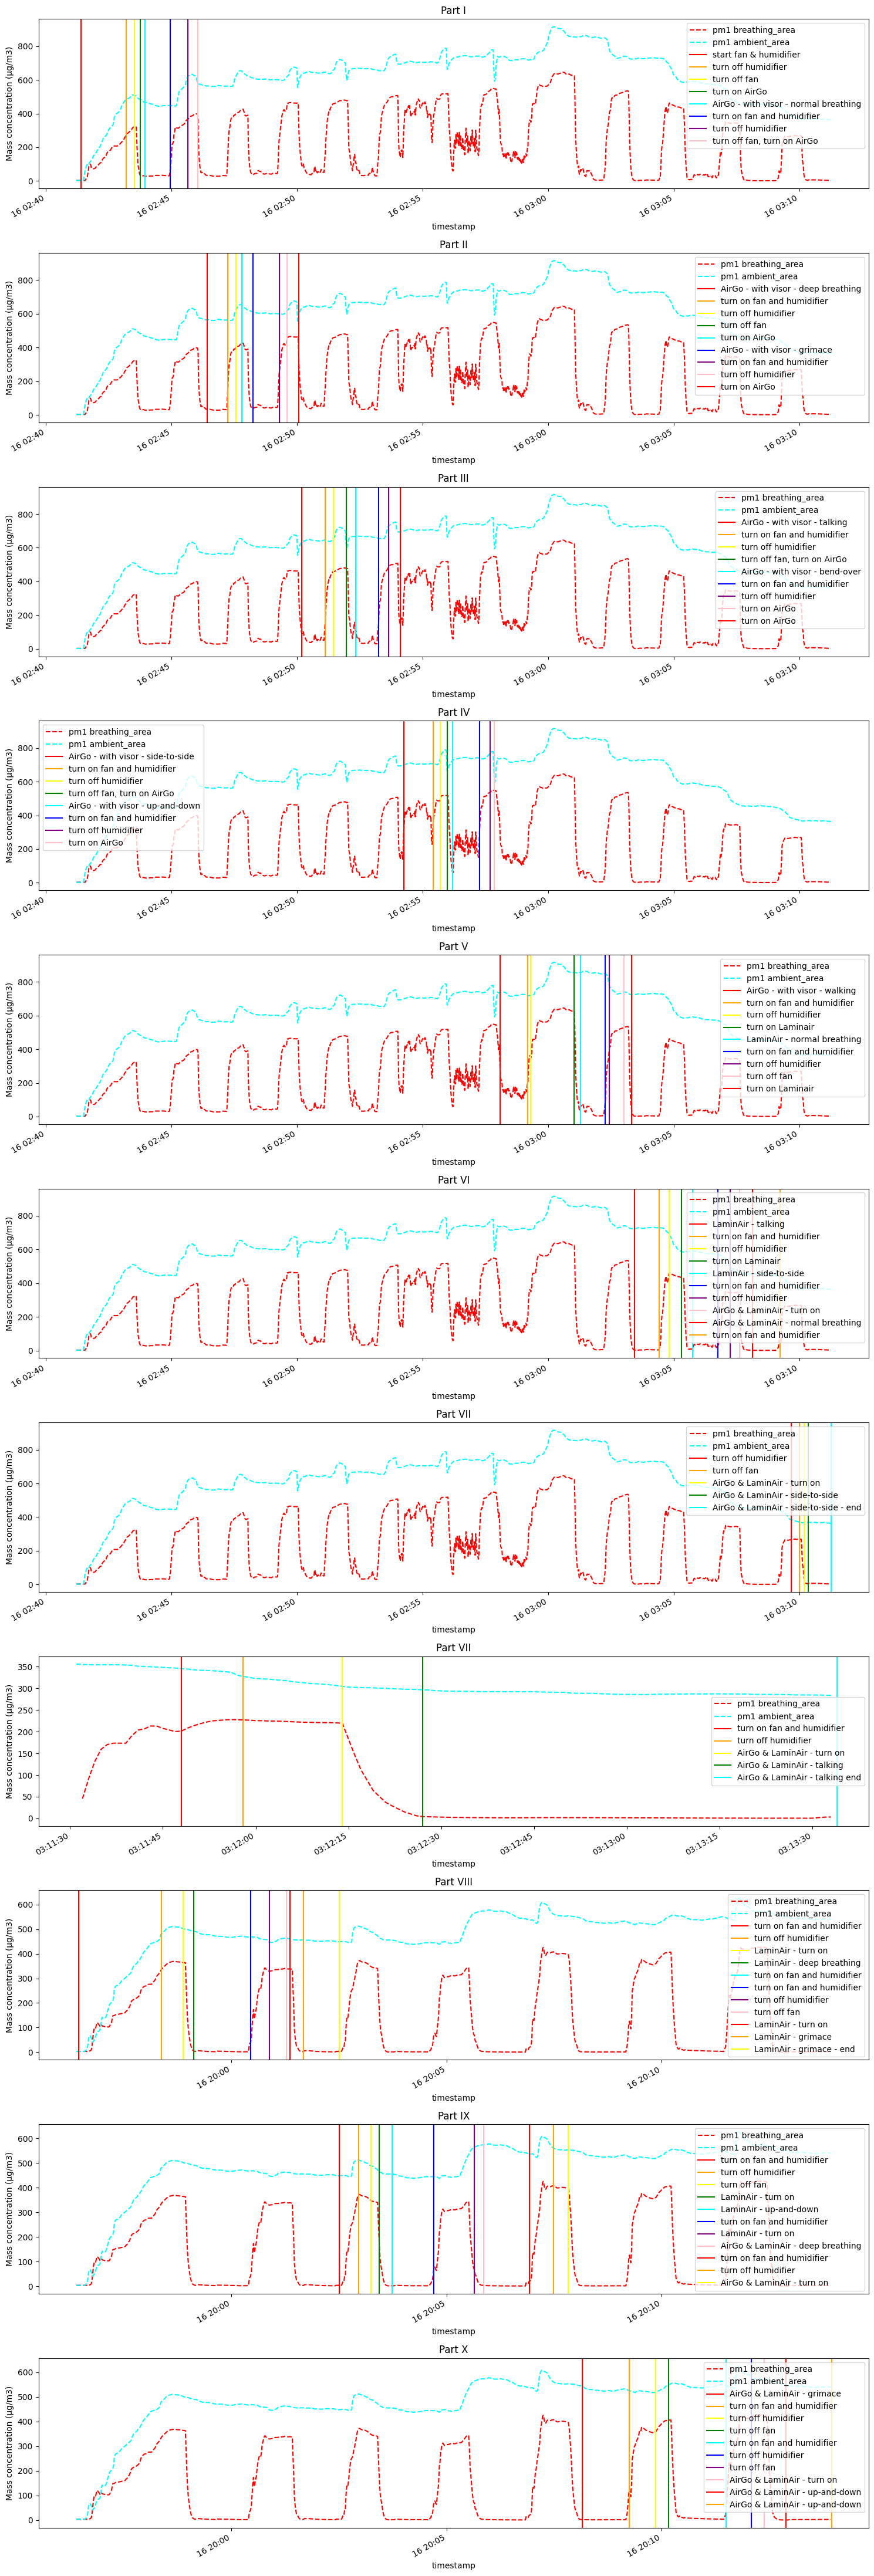

In [142]:
plot(
    metadata, 
    breathing_area_data=combined['breathing_area_df'], 
    ambient_data=combined['ambient_area_df'],
    breathing_area_vars=['pm1 breathing_area'],
    ambient_vars=['pm1 ambient_area'],
    row_size=4
)

In [143]:
fit_factors = get_fit_factors(
    [
        {
            'metadata': metadata,
            'breathing_area_sensor_data': combined['breathing_area_df'],
            'ambient_sensor_data': combined['ambient_area_df']
        }
    ],
    title='graph',
    breathing_area_column='pm1 breathing_area',
    ambient_column='pm1'
)

/Users/eugaddan/Developer/iaq/utilities.py:46: RuntimeWarning: invalid value encountered in scalar divide
  return numerator / denominator


In [144]:
fit_factors

,graph,event,fit_factor
0,Part I,start fan & humidifier,1.864577
1,Part I,turn off humidifier,1.572468
2,Part I,turn off fan,2.729688
3,Part I,turn on AirGo,16.941429
4,Part I,AirGo - with visor - normal breathing,14.341690
...,...,...,...
79,Part X,turn on fan and humidifier,1.727325
80,Part X,turn off humidifier,1.347302
81,Part X,turn off fan,NaN
82,Part X,AirGo & LaminAir - turn on,5.107849


In [145]:
no_na = fit_factors[fit_factors['fit_factor'].notna()].copy()

In [146]:
no_na

,graph,event,fit_factor
0,Part I,start fan & humidifier,1.864577
1,Part I,turn off humidifier,1.572468
2,Part I,turn off fan,2.729688
3,Part I,turn on AirGo,16.941429
4,Part I,AirGo - with visor - normal breathing,14.341690
...,...,...,...
78,Part X,turn off fan,14.433278
79,Part X,turn on fan and humidifier,1.727325
80,Part X,turn off humidifier,1.347302
82,Part X,AirGo & LaminAir - turn on,5.107849


### Calibration

After turning on the humidifier and the mixing fan, while the device(s) such as the AirGo and LaminAir are turned off, we should expect a fit factor of 1. In other words, when the air is well mixed, the concentration in the breathing area should be the same as the concentration in any other area. However, we don't see this pattern. We see that the concentration in the breathing area is consistently smaller than the concentration in the ambient area. This suggests that there is a statistical bias that needs to be corrected for so that the interpretation of the fit factor is correct. Below, we can see that the fit factor is about 1.4 - 1.6 when it really should be about 1. We'll divide the fit factors by this value to adjust for this discrepancy.

In [147]:
no_na[no_na['event'].str.contains('off humidifier')]

,graph,event,fit_factor
1,Part I,turn off humidifier,1.572468
6,Part I,turn off humidifier,1.605354
9,Part II,turn off humidifier,1.574754
14,Part II,turn off humidifier,1.346522
17,Part III,turn off humidifier,1.489655
21,Part III,turn off humidifier,1.586929
25,Part IV,turn off humidifier,1.480119
29,Part IV,turn off humidifier,1.400237
32,Part V,turn off humidifier,1.430543
36,Part V,turn off humidifier,1.462251


<Axes: ylabel='Frequency'>

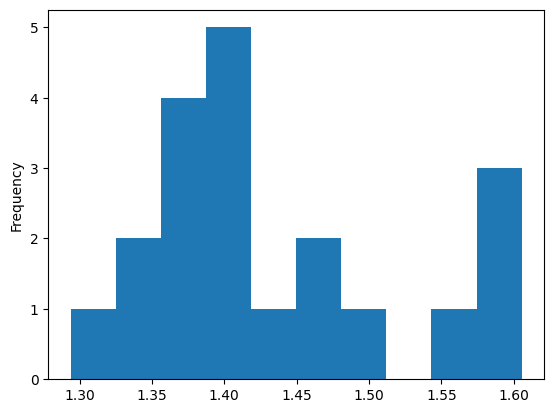

In [148]:
no_na[no_na['event'].str.contains('off humidifier')]['fit_factor'].plot.hist()

In [149]:
no_na['adjusted fit factor 1'] = no_na['fit_factor'] / 1.4
no_na['adjusted fit factor 2'] = no_na['fit_factor'] / 1.6

In [150]:
results = no_na[no_na['event'].str.contains('AirGo|LaminAir') & ~no_na['event'].str.contains('turn')].copy()
results

,graph,event,fit_factor,adjusted fit factor 1,adjusted fit factor 2
4,Part I,AirGo - with visor - normal breathing,14.341690,10.244064,8.963556
7,Part II,AirGo - with visor - deep breathing,16.990390,12.135993,10.618994
12,Part II,AirGo - with visor - grimace,12.048281,8.605915,7.530176
15,Part III,AirGo - with visor - talking,11.442173,8.172981,7.151358
19,Part III,AirGo - with visor - bend-over,14.652330,10.465950,9.157706
23,Part IV,AirGo - with visor - side-to-side,1.696143,1.211530,1.060089
27,Part IV,AirGo - with visor - up-and-down,3.320207,2.371577,2.075129
30,Part V,AirGo - with visor - walking,4.825042,3.446459,3.015652
34,Part V,LaminAir - normal breathing,27.692461,19.780329,17.307788
38,Part VI,LaminAir - talking,184.936287,132.097348,115.585179


In [151]:
results

,graph,event,fit_factor,adjusted fit factor 1,adjusted fit factor 2
4,Part I,AirGo - with visor - normal breathing,14.341690,10.244064,8.963556
7,Part II,AirGo - with visor - deep breathing,16.990390,12.135993,10.618994
12,Part II,AirGo - with visor - grimace,12.048281,8.605915,7.530176
15,Part III,AirGo - with visor - talking,11.442173,8.172981,7.151358
19,Part III,AirGo - with visor - bend-over,14.652330,10.465950,9.157706
23,Part IV,AirGo - with visor - side-to-side,1.696143,1.211530,1.060089
27,Part IV,AirGo - with visor - up-and-down,3.320207,2.371577,2.075129
30,Part V,AirGo - with visor - walking,4.825042,3.446459,3.015652
34,Part V,LaminAir - normal breathing,27.692461,19.780329,17.307788
38,Part VI,LaminAir - talking,184.936287,132.097348,115.585179


In [152]:
results['exercises'] = results['event'].str.extract('(?<=AirGo - with visor - )(.*)')[0]

In [153]:
results

,graph,event,fit_factor,adjusted fit factor 1,adjusted fit factor 2,exercises
4,Part I,AirGo - with visor - normal breathing,14.341690,10.244064,8.963556,normal breathing
7,Part II,AirGo - with visor - deep breathing,16.990390,12.135993,10.618994,deep breathing
12,Part II,AirGo - with visor - grimace,12.048281,8.605915,7.530176,grimace
15,Part III,AirGo - with visor - talking,11.442173,8.172981,7.151358,talking
19,Part III,AirGo - with visor - bend-over,14.652330,10.465950,9.157706,bend-over
23,Part IV,AirGo - with visor - side-to-side,1.696143,1.211530,1.060089,side-to-side
27,Part IV,AirGo - with visor - up-and-down,3.320207,2.371577,2.075129,up-and-down
30,Part V,AirGo - with visor - walking,4.825042,3.446459,3.015652,walking
34,Part V,LaminAir - normal breathing,27.692461,19.780329,17.307788,NaN
38,Part VI,LaminAir - talking,184.936287,132.097348,115.585179,NaN


In [154]:
results['exercises'] = results['exercises'].mask(
    results['event'].str.extract('(?<=LaminAir - )(.*)')[0].notna(), 
    results['event'].str.extract('(?<=LaminAir - )(.*)')[0] 
)

In [155]:
results

,graph,event,fit_factor,adjusted fit factor 1,adjusted fit factor 2,exercises
4,Part I,AirGo - with visor - normal breathing,14.341690,10.244064,8.963556,normal breathing
7,Part II,AirGo - with visor - deep breathing,16.990390,12.135993,10.618994,deep breathing
12,Part II,AirGo - with visor - grimace,12.048281,8.605915,7.530176,grimace
15,Part III,AirGo - with visor - talking,11.442173,8.172981,7.151358,talking
19,Part III,AirGo - with visor - bend-over,14.652330,10.465950,9.157706,bend-over
23,Part IV,AirGo - with visor - side-to-side,1.696143,1.211530,1.060089,side-to-side
27,Part IV,AirGo - with visor - up-and-down,3.320207,2.371577,2.075129,up-and-down
30,Part V,AirGo - with visor - walking,4.825042,3.446459,3.015652,walking
34,Part V,LaminAir - normal breathing,27.692461,19.780329,17.307788,normal breathing
38,Part VI,LaminAir - talking,184.936287,132.097348,115.585179,talking


In [156]:
results['model'] = results['event'].str.extract('(.*)(?= -)')[0]

In [157]:
results

,graph,event,fit_factor,adjusted fit factor 1,adjusted fit factor 2,exercises,model
4,Part I,AirGo - with visor - normal breathing,14.341690,10.244064,8.963556,normal breathing,AirGo - with visor
7,Part II,AirGo - with visor - deep breathing,16.990390,12.135993,10.618994,deep breathing,AirGo - with visor
12,Part II,AirGo - with visor - grimace,12.048281,8.605915,7.530176,grimace,AirGo - with visor
15,Part III,AirGo - with visor - talking,11.442173,8.172981,7.151358,talking,AirGo - with visor
19,Part III,AirGo - with visor - bend-over,14.652330,10.465950,9.157706,bend-over,AirGo - with visor
23,Part IV,AirGo - with visor - side-to-side,1.696143,1.211530,1.060089,side-to-side,AirGo - with visor
27,Part IV,AirGo - with visor - up-and-down,3.320207,2.371577,2.075129,up-and-down,AirGo - with visor
30,Part V,AirGo - with visor - walking,4.825042,3.446459,3.015652,walking,AirGo - with visor
34,Part V,LaminAir - normal breathing,27.692461,19.780329,17.307788,normal breathing,LaminAir
38,Part VI,LaminAir - talking,184.936287,132.097348,115.585179,talking,LaminAir


In [158]:
pivot = results.pivot(
    index='exercises',
    columns='model',
    values='adjusted fit factor 1'
)

In [159]:
pivot

model,AirGo & LaminAir,AirGo - with visor,LaminAir
exercises,,,
bend-over,NaN,10.465950,NaN
deep breathing,182.304531,12.135993,87.483636
grimace,81.188545,8.605915,98.775371
normal breathing,58.972427,10.244064,19.780329
side-to-side,52.044998,1.211530,13.276684
talking,145.094356,8.172981,132.097348
up-and-down,203.038730,2.371577,94.641080
walking,NaN,3.446459,NaN


Text(0.5, 1.0, 'Exposure Reduction Factors')

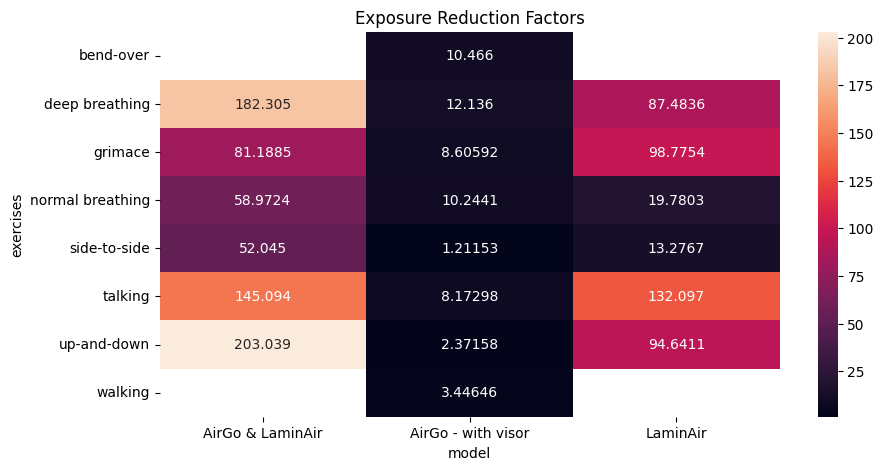

In [161]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.heatmap(pivot, annot=True, fmt='g', ax=ax)
ax.set_title("Exposure Reduction Factors")